<a href="https://colab.research.google.com/github/seunghoonss/AI-HACKATHON/blob/main/DeepFake_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from tqdm import tqdm
import requests
import shutil
import dlib

## FIFA 22 complete player dataset

https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

In [2]:
df = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/players_22.csv')

df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [3]:
df.iloc[0]

sofifa_id                                                      158023
player_url          https://sofifa.com/player/158023/lionel-messi/...
short_name                                                   L. Messi
long_name                              Lionel Andrés Messi Cuccittini
player_positions                                           RW, ST, CF
                                          ...                        
player_face_url     https://cdn.sofifa.net/players/158/023/22_120.png
club_logo_url                  https://cdn.sofifa.net/teams/73/60.png
club_flag_url                     https://cdn.sofifa.net/flags/fr.png
nation_logo_url              https://cdn.sofifa.net/teams/1369/60.png
nation_flag_url                   https://cdn.sofifa.net/flags/ar.png
Name: 0, Length: 110, dtype: object

In [4]:
df.iloc[0]['wage_eur'] # 주급(유로)

320000.0

In [5]:
df.iloc[0]['overall'] # player current overall attribute 플레이어 종합 점수

93

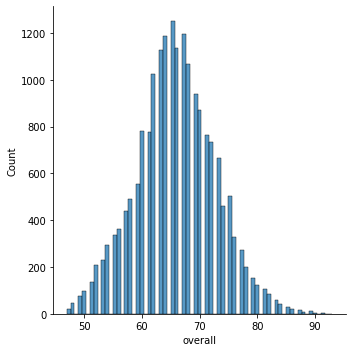

In [ ]:
sns.displot(df['overall'])

## 얼굴 사진 다운로드

40분 소요

In [ ]:
os.makedirs('imgs', exist_ok=True)

for i, row in tqdm(df.iterrows()):
    img_url = row['player_face_url']
    overall = row['overall']

    r = requests.get(img_url, stream=True, headers={'User-agent': 'Mozilla/5.0'})

    if r.status_code == 200:
        with open('imgs/%s_%s.png' % (i, overall), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
    else:
        print(row['short_name'])

19239it [41:16,  7.77it/s]


## Arcface 얼굴 인식 패키지 설치

https://pypi.org/project/arcface

In [ ]:
!pip install -q arcface

     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 596 kB 18.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## 얼굴 인식 방법

In [ ]:
from glob import glob

img_list = glob('imgs/*.png')

img_list[:5]

['imgs/9424_66.png',
 'imgs/11199_64.png',
 'imgs/16112_59.png',
 'imgs/7910_67.png',
 'imgs/10044_65.png']

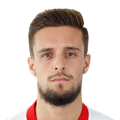

In [ ]:
from PIL import Image

Image.open(img_list[0])

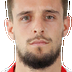

In [ ]:
detector = dlib.get_frontal_face_detector()

img = Image.open(img_list[0]).convert('RGB')

dets = detector(np.array(img))
det = dets[0]

x1 = det.left()
y1 = det.top()
x2 = det.right()
y2 = det.bottom()

crop_img = img.crop((x1, y1, x2, y2))
crop_img.save('temp_crop.jpg')

crop_img

In [ ]:
from arcface import ArcFace

face_rec = ArcFace.ArcFace()

emb = face_rec.calc_emb('temp_crop.jpg')

emb.shape

(512,)

In [ ]:
emb

array([ 0.08460525,  0.01085301, -0.0242081 ,  0.08500692, -0.00769556,
        0.01839826, -0.02836336, -0.00018048, -0.03329093, -0.02750258,
       -0.02045499, -0.06439389, -0.02495923,  0.01064522, -0.0008294 ,
        0.01277499,  0.0557071 , -0.07099809,  0.01488134,  0.00819454,
        0.00802917,  0.04663954, -0.071403  ,  0.09355089,  0.02395842,
       -0.00065712, -0.01767427, -0.00024271,  0.01099034, -0.01071384,
        0.0016296 ,  0.02118795,  0.03942361,  0.04471018,  0.02802627,
        0.01710044,  0.0176603 ,  0.06783129,  0.00881217, -0.03482414,
       -0.03890683, -0.0221221 , -0.01541948, -0.04314522, -0.06115589,
        0.07599229, -0.07674113, -0.00376754, -0.0655333 ,  0.00154092,
       -0.01155569,  0.02510642,  0.03666664, -0.10323216, -0.06963331,
        0.02232262,  0.05197876,  0.01298841, -0.02366159, -0.05462192,
       -0.00035358, -0.00601528,  0.0257247 ,  0.07499074, -0.11697097,
       -0.02737203, -0.01154956,  0.00937578, -0.00483807, -0.12

## 데이터셋 만들기

20분 소요

In [ ]:
x_data = np.empty((len(img_list), 512), dtype=np.float32)
y_data = np.empty((len(img_list), 1), dtype=np.float32)

for i, img_path in tqdm(enumerate(img_list)):
    img = Image.open(img_path).convert('RGB')

    dets = detector(np.array(img))

    if len(dets) != 1:
        continue

    det = dets[0]
    x1 = det.left()
    y1 = det.top()
    x2 = det.right()
    y2 = det.bottom()

    crop_img = img.crop((x1, y1, x2, y2))
    crop_img.save('temp_crop.jpg')

    emb = face_rec.calc_emb('temp_crop.jpg')

    overall = int(os.path.splitext(os.path.basename(img_path))[0].split('_')[1])

    x_data[i] = emb
    y_data[i] = overall

print(x_data.shape)
print(y_data.shape)

19239it [21:16, 15.08it/s]

(19239, 512)
(19239, 1)


## 학습/검증 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(15391, 512) (15391, 1)
(3848, 512) (3848, 1)


## 모델 정의

- 입력 : 얼굴 임베딩 벡터
- 출력 : 플레이어 종합 점수

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, input_shape=(512,), activation="relu"),
    layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 131,585
Trainable params: 131,585
Non-trainable params: 0
_________________________________________________________________


## 학습

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
61/61 [==============================] - 1s 9ms/step - loss: 2952.3911 - mae: 46.8049 - val_loss: 2368.3877 - val_mae: 41.8167
Epoch 2/20
61/61 [==============================] - 1s 8ms/step - loss: 1655.9130 - mae: 34.7293 - val_loss: 925.6847 - val_mae: 25.3232
Epoch 3/20
61/61 [==============================] - 1s 8ms/step - loss: 559.6241 - mae: 18.4066 - val_loss: 385.4109 - val_mae: 14.7046
Epoch 4/20
61/61 [==============================] - 1s 9ms/step - loss: 333.0439 - mae: 13.9706 - val_loss: 328.3456 - val_mae: 13.9739
Epoch 5/20
61/61 [==============================] - 0s 7ms/step - loss: 292.3257 - mae: 13.3552 - val_loss: 293.6638 - val_mae: 13.4212
Epoch 6/20
61/61 [==============================] - 0s 7ms/step - loss: 263.5115 - mae: 12.8825 - val_loss: 267.4031 - val_mae: 12.9958
Epoch 7/20
61/61 [==============================] - 1s 8ms/step - loss: 242.2784 - mae: 12.5202 - val_loss: 248.5385 - val_mae: 12.6618
Epoch 8/20
61/61 [===========================

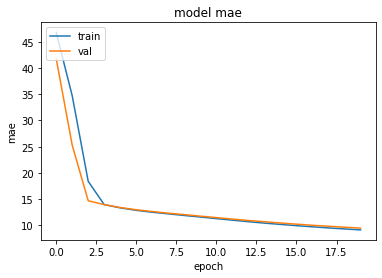

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 임의의 이미지로 테스트

In [ ]:
!wget https://image.ytn.co.kr/general/jpg/2022/0321/202203210525380545_t.jpg -O 01.jpg

--2022-07-30 14:56:52--  https://image.ytn.co.kr/general/jpg/2022/0321/202203210525380545_t.jpg
Resolving image.ytn.co.kr (image.ytn.co.kr)... 183.111.24.147
Connecting to image.ytn.co.kr (image.ytn.co.kr)|183.111.24.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113623 (111K) [image/jpeg]
Saving to: ‘01.jpg’

01.jpg              100%[===================>] 110.96K   468KB/s    in 0.2s    

2022-07-30 14:56:53 (468 KB/s) - ‘01.jpg’ saved [113623/113623]



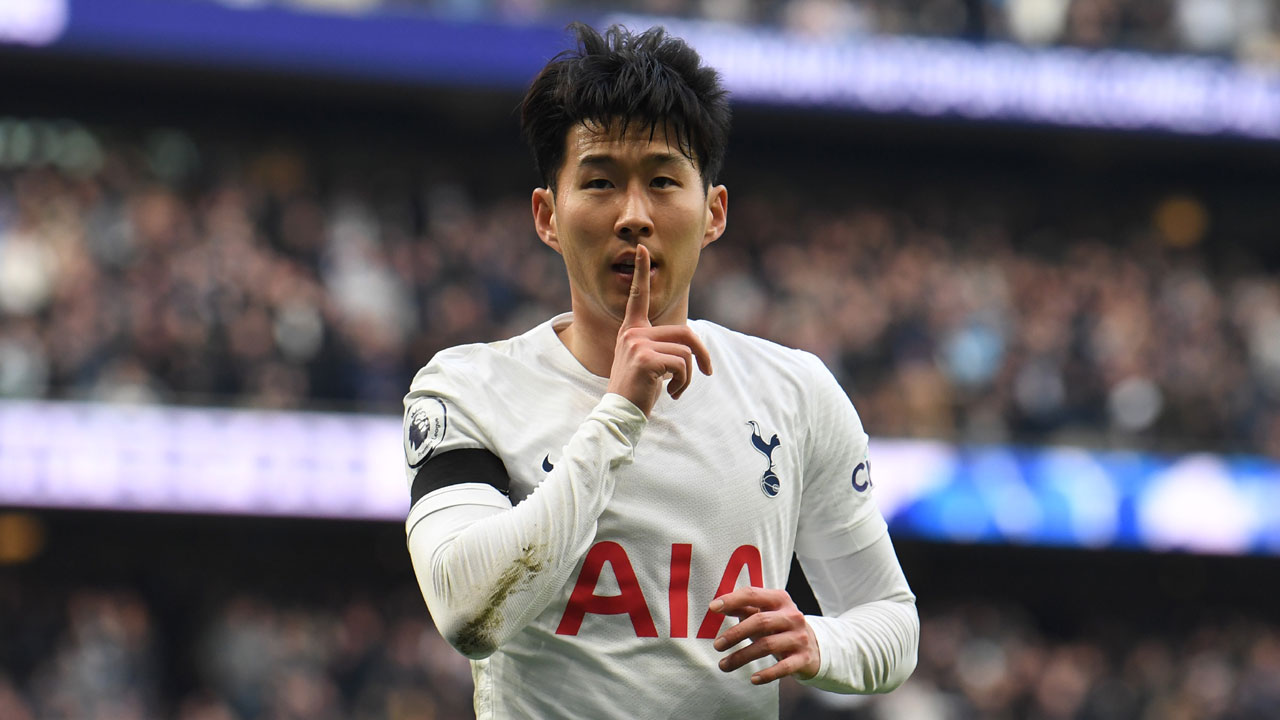

In [ ]:
test_img = Image.open('01.jpg')

test_img

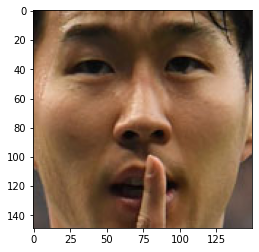

In [ ]:
dets = detector(np.array(test_img))

det = dets[0]

x1 = det.left()
y1 = det.top()
x2 = det.right()
y2 = det.bottom()

crop_img = test_img.crop((x1, y1, x2, y2))
crop_img.save('crop.jpg')

plt.imshow(crop_img)

In [ ]:
emb = face_rec.calc_emb('crop.jpg')

emb = np.expand_dims(emb, axis=0)

emb.shape

(1, 512)

In [ ]:
model.predict(emb)

array([[70.99757]], dtype=float32)